In [2]:
import torch, torchvision
from torch.autograd import Variable
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import Sampler
import itertools, math
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn.functional as F
import torch.nn as nn
from oil.augLayers as augLayers
from torchvision.datasets import CIFAR10

%matplotlib inline
%load_ext autoreload
%autoreload 2

ImportError: No module named 'oil'

## CNN Configuration

## Dataset

In [2]:
img_size = 32
trans = transforms.Compose(
    [transforms.Resize(img_size),
     #transforms.RandomCrop(32, padding=4),
     #transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

trans_aug = transforms.Compose(
    [transforms.Resize(img_size),
     transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

pathToDataset = '/scratch/datasets/cifar10/'
trainset = CIFAR10(pathToDataset, download=True, transform=trans)
trainset_aug = CIFAR10(pathToDataset, download=True, transform=trans_aug)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
aug_net = nn.Sequential(
    augLayers.RandomTranslate(4),
    augLayers.RandomHorizontalFlip())

In [4]:
loader = DataLoader(trainset, batch_size=8)
aug_loader = DataLoader(trainset_aug, batch_size=8)

it = iter(loader)
aug_it = iter(aug_loader)

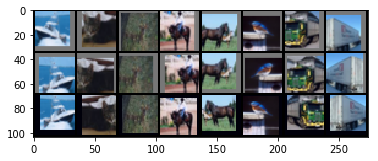

In [7]:
x0,y0 = next(it)
x1 = aug_net(x0.cuda()).cpu().data
x2 = aug_net(x0.cuda()).cpu().data
x3,y3 = next(aug_it)
both = torch.cat((x1,x2,x3))
imgs = torchvision.utils.make_grid(both, normalize=True, nrow=8)
plt.imshow(np.transpose(imgs, (1, 2, 0)))

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def cosLr(cycle_length, cycle_mult, restart=False):
    def lrSched(epoch):
        r = cycle_mult + 1e-8
        L = cycle_length #base
        current_cycle = np.floor(np.log(1+(r-1)*epoch/L)/np.log(r))
        current_cycle_length = L*r**current_cycle
        cycle_iter = epoch - L*(r**current_cycle - 1)/(r-1)
        cos_scale = .5*(1 + np.cos(np.pi*cycle_iter/current_cycle_length))
        return cos_scale
    return lrSched

def sigmoidConsRamp(rampup_length):
    def weightSched(epoch):
        """Exponential rampup from https://arxiv.org/abs/1610.02242"""
        if rampup_length == 0:
            return 1.0
        else:
            current = np.clip(epoch, 0.0, rampup_length)
            phase = 1.0 - current / rampup_length
            return float(np.exp(-5.0 * phase * phase))
    return weightSched

In [10]:
f = cosLr(350,1); f2 = sigmoidConsRamp(5)

In [11]:
x = np.arange(0,350)

In [12]:
y = np.array(list(map(f,x))); y2 = np.array(list(map(f2,x)))

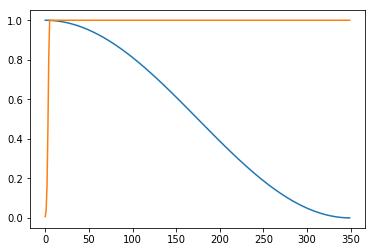

In [13]:
plt.plot(x,y)
plt.plot(x,y2)
#plt.ylim(0,.1)
plt.show()

In [89]:
y = np.random.choice(6,100)

In [90]:
def classBalancedSampleIndices(y, numLabeled):
    uniqueVals = np.unique(y)
    numLabeled = (numLabeled // len(uniqueVals))*len(uniqueVals)
    classIndices = [np.where(y==val) for val in uniqueVals]
    sampledIndices = np.empty(numLabeled, dtype=np.int64)
    m = numLabeled // len(uniqueVals) # The Number of Samples per Class
    for i in range(len(uniqueVals)):
        smpldClssIndcs = np.random.choice(classIndices[i][0],m,replace=False)
        sampledIndices[i*m:i*m+m] = smpldClssIndcs
    return sampledIndices

In [94]:
y[classBalancedSampleIndices(y, 14)]

12


array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

In [ ]:
z[0]

In [ ]:
y[z[3]]